In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# API key
api_key = api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# Check format of Json file from API call
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q=london"
response = requests.get(url).json
pp = pprint.pprint(response)
print(pp)

<bound method Response.json of <Response [200]>>
None


In [4]:
# Label empty lists to append into from API calls
city_name = []
clouds_all = []
wind_speed = []
coord_lng = []
coord_lat = []
sys_country = []
main_humidity = []
main_temp_min = []
main_temp_max = []

#Determine number of iterations
count = 0
group = 1

# Set up query URL
query_url =f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q="

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        clouds_all.append(response['clouds']['all'])
        sys_country.append(response['sys']['country'])
        main_humidity.append(response['main']['humidity'])
        coord_lat.append(response['coord']['lat'])
        coord_lng.append(response['coord']['lon'])
        main_temp_max.append(response['main']['temp_max'])
        main_temp_min.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        if count > 48:
            count = 1
            group += 1
            city_name.append(city)
        else:
            count += 1
            city_name.append(city)
        print(f"Processing Record {count} of Group {group} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
        


Processing Record 1 of Group 1 | ushuaia
Processing Record 2 of Group 1 | hambantota
City not found. Skipping...
Processing Record 3 of Group 1 | mozarlandia
Processing Record 4 of Group 1 | upernavik
City not found. Skipping...
Processing Record 5 of Group 1 | hailar
Processing Record 6 of Group 1 | rikitea
Processing Record 7 of Group 1 | cape town
Processing Record 8 of Group 1 | marawi
Processing Record 9 of Group 1 | sabang
Processing Record 10 of Group 1 | jamestown
Processing Record 11 of Group 1 | provideniya
Processing Record 12 of Group 1 | esperance
Processing Record 13 of Group 1 | butaritari
Processing Record 14 of Group 1 | bredasdorp
Processing Record 15 of Group 1 | srednekolymsk
Processing Record 16 of Group 1 | sorong
Processing Record 17 of Group 1 | manokwari
Processing Record 18 of Group 1 | bilma
Processing Record 19 of Group 1 | east london
Processing Record 20 of Group 1 | barrow
Processing Record 21 of Group 1 | busselton
Processing Record 22 of Group 1 | bud
P

Processing Record 29 of Group 4 | sao filipe
Processing Record 30 of Group 4 | tulun
Processing Record 31 of Group 4 | mackay
Processing Record 32 of Group 4 | arlit
Processing Record 33 of Group 4 | mar del plata
City not found. Skipping...
Processing Record 34 of Group 4 | ajdabiya
Processing Record 35 of Group 4 | hami
City not found. Skipping...
Processing Record 36 of Group 4 | kropotkin
Processing Record 37 of Group 4 | cherskiy
Processing Record 38 of Group 4 | bethel
Processing Record 39 of Group 4 | chuy
Processing Record 40 of Group 4 | hornepayne
City not found. Skipping...
Processing Record 41 of Group 4 | margate
Processing Record 42 of Group 4 | wawa
Processing Record 43 of Group 4 | deputatskiy
Processing Record 44 of Group 4 | codrington
Processing Record 45 of Group 4 | hadejia
Processing Record 46 of Group 4 | novita
Processing Record 47 of Group 4 | sobolevo
Processing Record 48 of Group 4 | harper
Processing Record 49 of Group 4 | airai
Processing Record 1 of Group 

Processing Record 8 of Group 8 | parakai
Processing Record 9 of Group 8 | mackenzie
Processing Record 10 of Group 8 | villa maria
Processing Record 11 of Group 8 | perth
Processing Record 12 of Group 8 | avera
Processing Record 13 of Group 8 | camocim
City not found. Skipping...
Processing Record 14 of Group 8 | talmenka
Processing Record 15 of Group 8 | saint-francois
Processing Record 16 of Group 8 | zhigansk
Processing Record 17 of Group 8 | nabire
Processing Record 18 of Group 8 | marica
Processing Record 19 of Group 8 | bayan
Processing Record 20 of Group 8 | safford
Processing Record 21 of Group 8 | kumluca
City not found. Skipping...
Processing Record 22 of Group 8 | nha trang
Processing Record 23 of Group 8 | baruun-urt
Processing Record 24 of Group 8 | kamenka
Processing Record 25 of Group 8 | mayo
Processing Record 26 of Group 8 | calmar
Processing Record 27 of Group 8 | progreso
City not found. Skipping...
Processing Record 28 of Group 8 | ulaangom
Processing Record 29 of Gr

Processing Record 36 of Group 11 | alice springs
City not found. Skipping...
Processing Record 37 of Group 11 | innisfail
City not found. Skipping...
Processing Record 38 of Group 11 | tigzirt
Processing Record 39 of Group 11 | boa vista
------------------------------
Data Retrieval Complete
------------------------------


In [9]:
# Convert data into dataframe
weather_columns = {
    "City":city_name,
    "Cloudiness":clouds_all,
    "Country":sys_country,
    "Humidity":main_humidity,
    "Lat":coord_lat,
    "Lng":coord_lng,
    "Max Temp":main_temp_max, 
    "Min Temp":main_temp_min, 
    "Wind Speed":wind_speed
}

In [14]:
weather_df = pd.DataFrame(weather_columns)
weather_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,ushuaia,20,AR,90,-54.81,-68.31,42.80,42.80,19.46
1,hambantota,80,LK,81,6.12,81.12,81.15,81.15,16.06
2,mozarlandia,5,BR,7,-14.74,-50.57,97.35,97.35,4.94
3,upernavik,0,GL,80,72.79,-56.15,40.83,40.83,3.76
4,hailar,20,CN,90,49.20,119.70,55.77,55.77,3.09


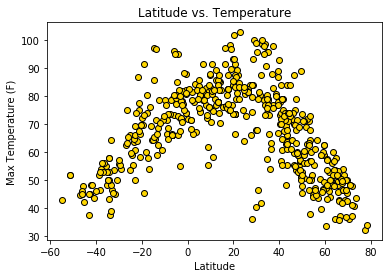

In [16]:
# Plot Temperature(F) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="gold")
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("tempVSlat.png")
plt.show()

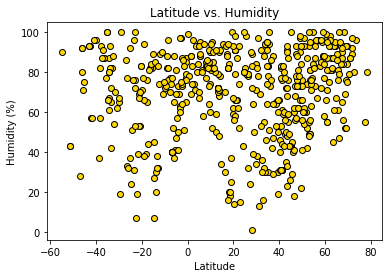

In [18]:
# Plot Humidity(%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="gold")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("humidityVSlat.png")
plt.show()

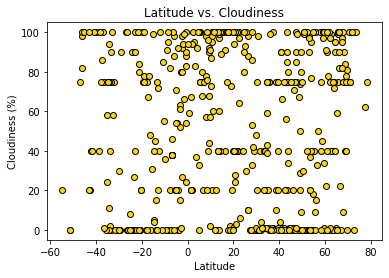

In [19]:
# Plot Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="gold")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("cloudVSlat.png")
plt.show()

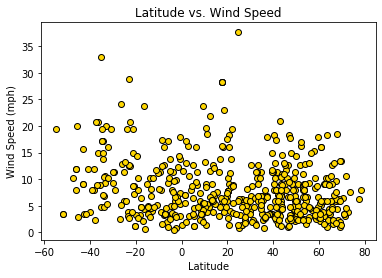

In [20]:
# Plot Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="gold")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("windVSlat.png")
plt.show()